In [35]:
# EE03 - Solução da equação diferencial de estados
# Exemplo 1 slide 5

In [36]:
import numpy as np
import control
import control.matlab
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg
import sympy as sp

In [46]:
# parametros do circuito


# Matrizes
A = [[0, 1, 0], [0, 0, 1],[-24, -26, -9]];
A = np.matrix(A)
B = [[0], [0], [1]];
B = np.matrix(B)
C = np.matrix('1, 1, 0');
D = np.matrix('0');
X0 = [[1], [0], [2]];
X0 = np.matrix(X0)


In [47]:
# Solução com a transformada de laplace
#s, t = sp.symbols('s t')
s = sp.symbols('s')
t = sp.symbols('t', positive=True)

U = 1/(s+1);
# Matrizes
A = sp.Matrix(A);
B = sp.Matrix(B);
C = sp.Matrix(C);
D = sp.Matrix(D);
X0 = sp.Matrix(X0);
I = np.eye(3);

X = ((s*I-A)**-1)*X0+((s*I-A)**-1)*B*U;
Y = C*X;
Y = sp.expand(Y)
Y = sp.simplify(Y)
#Y = Y[0]
Y = Y.apart(s)
Y

Matrix([[-3.25/(0.5*s + 1.0) + 6.33333333333333/(0.333333333333333*s + 1.0) - 2.875/(0.25*s + 1.0)]])

In [48]:
F1 = -3.25/(0.5*s+1);
F2 = 6.33333333333333/(0.333333333333333*s+1);
F3 = -2.875/(0.25*s+1);

y = sp.inverse_laplace_transform(F1+F3, s, t)+sp.inverse_laplace_transform(F2, s, t)
y

-11.5*exp(-4.0*t) + 19.0*exp(-3.0*t) - 6.5*exp(-2.0*t)

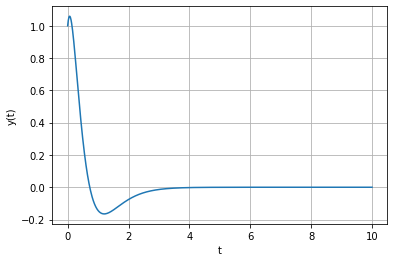

In [49]:
# comparando os resultados
# resposta da sulução encontrada
t = np.linspace(0, 10, 999);
y = -6.5*np.exp(-2*t)+19*np.exp(-3*t)-11.5*np.exp(-4*t);
plt.figure()
plt.plot(t, y)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()

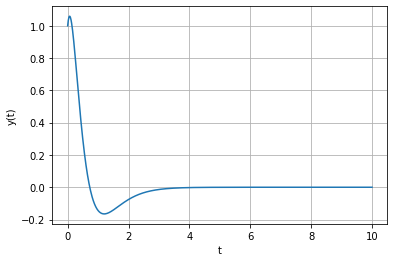

In [53]:
# resposta com o comando lsim
u = np.exp(-t);
# sistema no espaço de estados
sistema = control.ss(A,B,C,D);
X0 = [[1], [0], [2]];
X0 = np.matrix(X0)
#sistema = control.ss(A,B,C,D);
y2, t, x = control.matlab.lsim(sys, u, t, X0);
plt.figure()
plt.plot(t, y2)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()